
# [Concatenation (Combining Data Tables) with Pandas and Python](https://www.dataquest.io/blog/pandas-concatenation-tutorial/)

- pd.concat() function: the most multi-purpose and can be used to combine multiple DataFrames **along either axis**.
- DataFrame.append() method: a quick way to **add rows** to your DataFrame, but not applicable for adding columns.
- pd.merge() function: great for joining two DataFrames together when we have one column (key) containing common values.
- DataFrame.join() method: a quicker way to **join two DataFrames**, but works only off index labels rather than columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We will use the pd.read_csv() function to open our first two data files. We will specify that the first column should be used as the row index by passing the argument index_col=0. Finally, we’ll display what our initial tables look like.

In [2]:
north_america=pd.read_csv("Pandas Concatenation Tutorial/north_america_2000_2010.csv",index_col=0)

In [3]:
south_america=pd.read_csv("Pandas Concatenation Tutorial/south_america_2000_2010.csv",index_col=0)

In [4]:
north_america

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0


In [5]:
south_america

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Chile,2263,2242,2250,2235,2232,2157,2165,2128,2095,2074,2069.6


## df.transpose()

By default, the DataFrame.plot() method 
- treats rows as x axis labels, 
- cell values as y axis labels, and 
- columns as lines. 

<AxesSubplot:xlabel='Country'>

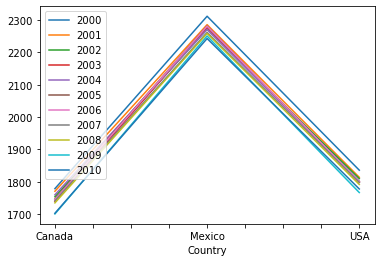

In [6]:
north_america.plot()

The quick fix here is to pivot the axes on our DataFrame using the **DataFrame.transpose()** method.

To make our visualizations compelte, we’ll add a title using the title='string' parameter in the plot method. We can chain these methods together and then use plt.show() to neatly display our line graphs without the line of matplotlib text above the plot.

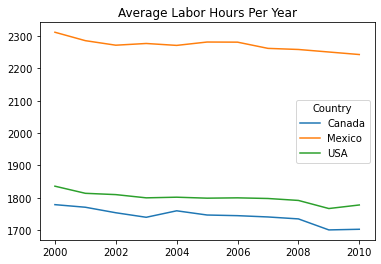

In [7]:
north_america.transpose().plot(title="Average Labor Hours Per Year")
plt.show()

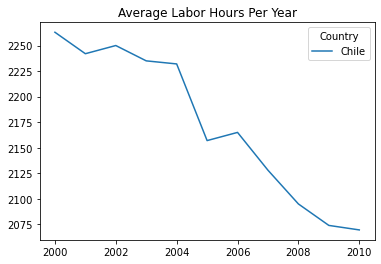

In [8]:
south_america.transpose().plot(title='Average Labor Hours Per Year')
plt.show()

## Concatenating Americas data

For simple operations where we need to **add rows or columns** of the same length, the **pd.concat()** function is perfect. 

All we have to do is pass in **a list of DataFrame** objects in the order we would like them concatenated.

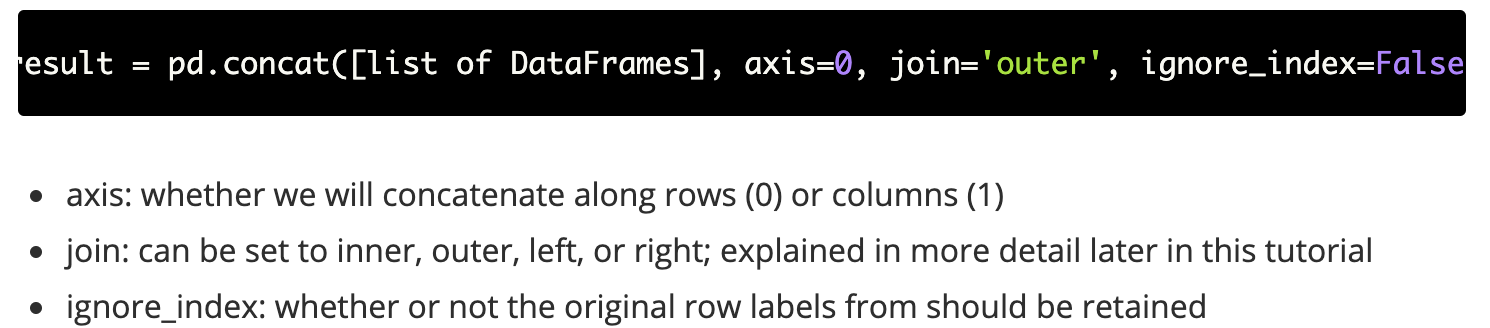

### Concatenate two dfs

In [6]:
americas=pd.concat([north_america,south_america])
americas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6


In [7]:
americas_seq=pd.concat([north_america,south_america],ignore_index=True)
americas_seq

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
1,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
2,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0
3,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6


### Concatenate multiple dfs

After requesting data on these four countries from later years, the data collection team sent us each year from 2011 to 2015 in separate CSV files as follows:

<span class="mark">[americas_2011.csv , americas_2012.csv, americas_2014.csv, americas_2015.csv]</span>

Let’s load in the new data using a for loop along with the string.format() method to automate the process a bit.
- We’ll be putting our americas DataFrame from earlier in to a list named americas_dfs and 

- appending each of these new DataFrames to that list.

- Finally, we will display the americas_2011 DataFrame using list indexing.

In [8]:
americas_dfs=[americas]
for year in range(2011,2016):
    filename="Pandas Concatenation Tutorial/americas_{}.csv".format(year)
    df=pd.read_csv(filename,index_col=0)
    americas_dfs.append(df)
americas_dfs[1]

,2011
Country,
Canada,1700.0
Chile,2047.4
Mexico,2250.2
USA,1786.0


#### ingore_index and axis
One thing you might notice is the rows in the americas_2011 DataFrame we just printed are not in the same sequence as the americas DataFrame (pandas automatically alphabetized them). 

**<font color='red'> Join on index lable not sequence</font>**  
Luckily, the **pd.concat()** function joins data on **index labels** (countries, in our case), **not sequence**, so this won’t pose an issue during concatenation.   

**<font color='red'> ignore_index=True</font>**  
If we wanted to instead concatenate the rows in the order they are currently in, we could pass the argument ignore_index=True. This would result in the indexes being assigned a sequence of integers.

**<font color='red'> axis=1 </font>**   

We can’t use the pd.concat() function exactly the same way we did last time, because now we are **adding columns** instead of rows. 

This is where axis comes into play. 
- By default, axis=0, which means we are concatenating rows. 
- This time, we will need to pass in **axis=1** to indicate we want to **concatenate columns**. 

![](https://www.dataquest.io/wp-content/uploads/2019/01/axis_diagram.jpg)

In [12]:
americas=pd.concat(americas_dfs,axis=1)
americas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5


In [11]:
americas2=pd.concat(americas_dfs,axis=1,ignore_index=True)
americas2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5


#### index name
When concatenating along **axis 1** is the **title for the row indexes**, ‘Country’, will be dropped.   

This is because pandas isn’t sure whether that title applies to the new row labels that have been added. 

In [13]:
americas.index.name='Country'

In [14]:
americas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5


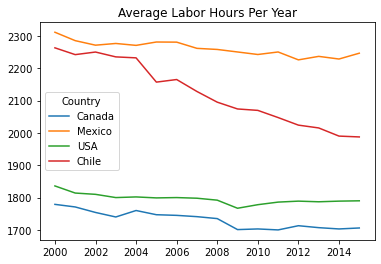

In [15]:
americas.transpose().plot(title='Average Labor Hours Per Year')
plt.show()

## Appending data

Pandas has a shortcut when you only want to add new rows called the DataFrame.append() method.  

The syntax is a little different – since it’s a DataFrame method, we will use dot notation to call it on our americas object and then pass in the new objects as arguments.

In [16]:
asia=pd.read_csv("Pandas Concatenation Tutorial/asia_2000_2015.csv",index_col=0)

In [17]:
asia

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Israel,2017,1979,1993,1974,1942,1931,1919,1931,1929,1927,1918,1920,1910,1867,1853,1858
Japan,1821,1809,1798,1799,1787,1775,1784,1785,1771,1714,1733,1728,1745,1734,1729,1719
Korea,2512,2499,2464,2424,2392,2351,2346,2306,2246,2232,2187,2090,2163,2079,2124,2113
Russia,1982,1980,1982,1993,1993,1989,1998,1999,1997,1974,1976,1979,1982,1980,1985,1978


In [18]:
europe=pd.read_csv("Pandas Concatenation Tutorial/europe_2000_2015.csv",index_col=0)

In [19]:
europe.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Austria,1807.4,1794.6,1792.2,1783.8,1786.8,1764.0,1746.2,1736.0,1728.5,1673.0,1668.6,1675.9,1652.9,1636.7,1629.4,1624.9
Belgium,1595.0,1588.0,1583.0,1578.0,1573.0,1565.0,1572.0,1577.0,1570.0,1548.0,1546.0,1560.0,1560.0,1558.0,1560.0,1541.0
Switzerland,1673.6,1635.0,1614.0,1626.8,1656.5,1651.7,1643.2,1632.7,1623.1,1614.9,1612.4,1605.4,1590.9,1572.9,1568.3,1589.7
Czech Republic,1896.0,1818.0,1816.0,1806.0,1817.0,1817.0,1799.0,1784.0,1790.0,1779.0,1800.0,1806.0,1776.0,1763.0,1771.0,1779.0
Germany,1452.0,1441.9,1430.9,1424.8,1422.2,1411.3,1424.7,1424.4,1418.4,1372.7,1389.9,1392.8,1375.3,1361.7,1366.4,1371.0


In [20]:
south_pacific=pd.read_csv("Pandas Concatenation Tutorial/south_pacific_2000_2015.csv",index_col=0)
south_pacific

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Australia,1778.7,1736.7,1731.7,1735.8,1734.5,1729.2,1720.5,1712.5,1717.2,1690,1691.5,1699.5,1678.6,1662.7,1663.6,1665
New Zealand,1836.0,1825.0,1826.0,1823.0,1830.0,1815.0,1795.0,1774.0,1761.0,1740,1755.0,1746.0,1734.0,1752.0,1762.0,1757


If any columns were missing from the data we are trying to append, they would result in those **rows having NaN values** in the cells falling under the missing year columns. 

Let’s run the append method and verify that all the countries have been sucesfully appended by printing DataFrame.index. Then we can plot a line graph to see what the new appended data looks like.

In [21]:
world=americas.append([asia,europe,south_pacific])

In [22]:
world.index

Index(['Canada', 'Mexico', 'USA', 'Chile', 'Israel', 'Japan', 'Korea',
       'Russia', 'Austria', 'Belgium', 'Switzerland', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden', 'Australia',
       'New Zealand'],
      dtype='object', name='Country')

<AxesSubplot:title={'center':'Average Labor Hours Per Year'}>

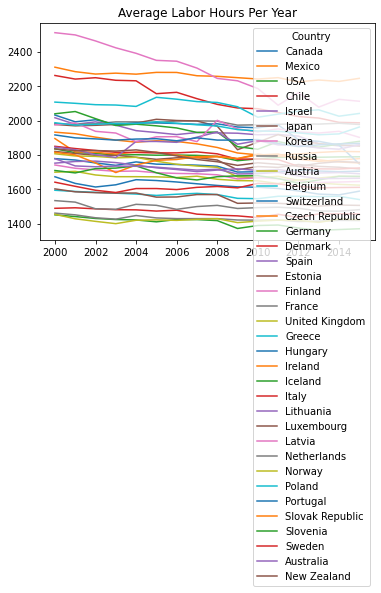

In [23]:
world.transpose().plot(title='Average Labor Hours Per Year')

## Customizing the visualization

- **figsize=(10,10)** argument, the tuple specifies the dimensions of the plot figure
- default colormap only contains 10 distinct colors,decided to use the rainbow map, this can be passed in as **colormap='rainbow'**
- thicker lines so I’m setting **linewidth=2**
----
- tackle the **legend** overlapping onto our plot  
  - **plt.legend()** function. We will pass in **loc='right'** to indicate we want the legend box to the right of the plot.
  - **bbox_to_anchor=(1.3,0.5) argument**; the tuple we pass in are coordinates of the legend box’s position relative to the plot. 

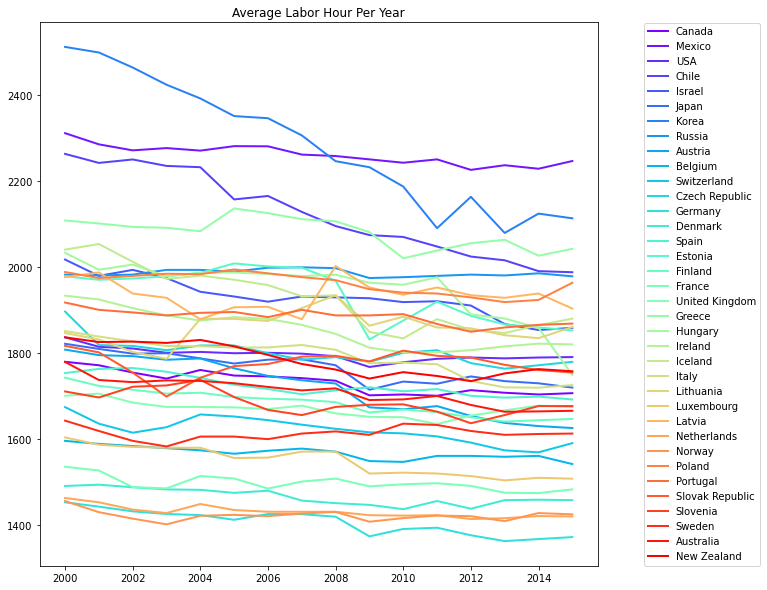

In [24]:
world.transpose().plot(figsize=(10,10),colormap="rainbow",linewidth=2, title='Average Labor Hour Per Year')
plt.legend(loc='right',bbox_to_anchor=(1.3,0.5))
plt.show()

## Merge tables 

- joins can only be done on **two DataFrames** at a time, denoted as left and right tables. 
- The **key** is the common column that the two DataFrames will be **joined on**. 

It’s a good practice to use keys which have **unique values** throughout the column to avoid unintended duplication of row values.

---

- four basic ways to handle the join **(inner, left, right, and outer)**, depending on which **rows must retain their data**.
- When merging, it’s important to keep in mind **which rows will be retained** from each table. 

**blue area** as the **portion of the key column** which will be retained in the final table

Retain rows in which both tables share a key value.
![](https://www.dataquest.io/wp-content/uploads/2017/12/inner-join.png)

Left/Right join keeps all rows that occur in the primary (left) table, and the right table will only concatenate on rows where it shares a key value with the left. 

NaN values will be filled in for cells where the there’s no matching key value.
![](https://www.dataquest.io/wp-content/uploads/2019/01/left-join.png)
![](https://www.dataquest.io/wp-content/uploads/2019/01/right-join.png)

Full outer join retains all rows occuring in both tables and NaN values can show up on either side of your resulting DataFrame.  
![](https://www.dataquest.io/wp-content/uploads/2019/01/full-outer-join.png)

In [25]:
historical=pd.read_csv("Pandas Concatenation Tutorial/historical.csv",index_col=0)

In [26]:
historical.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1779.5,1774.90,1773.70,1786.50,1797.60,1793.400,1782.700,1783.600,1768.40,1778.8
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1619.200,1637.150,1648.500,1641.65,1654.0
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1662.9,1625.79,1602.72,1558.59,1558.59,1515.835,1500.295,1510.315,1513.33,1514.5
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1789.5,1767.50,1766.00,1764.50,1773.00,1771.500,1786.500,1782.500,1778.50,1778.5
Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1673.10,1684.80,1685.80,1706.20,1685.500,1658.900,1648.600,1656.60,1678.4


You’ll notice there are a lot of NaN values, especially in the earlier years. 
- This simply means that there was no data collected for those countries in the earlier years. 
- Putting a 0 in those cells would be misleading, as it would imply that no one spent any hours working that year! I

Instead, NaN represents a null value, meaning “not a number”. Having null values will not affect our DataFrame merging since we will use the row labels (index) as our key.

In [27]:
historical.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1779.5,1774.90,1773.70,1786.50,1797.60,1793.400,1782.700,1783.600,1768.40,1778.8
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1619.200,1637.150,1648.500,1641.65,1654.0
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1662.9,1625.79,1602.72,1558.59,1558.59,1515.835,1500.295,1510.315,1513.33,1514.5
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1789.5,1767.50,1766.00,1764.50,1773.00,1771.500,1786.500,1782.500,1778.50,1778.5
Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1673.10,1684.80,1685.80,1706.20,1685.500,1658.900,1648.600,1656.60,1678.4


In [28]:
print("World rows and columns",world.shape)
print("Historical rows and columns", historical.shape)

World rows and columns (36, 16)
Historical rows and columns (39, 50)


Dropping the three extra rows can be automatically taken care of with some proper DataFrame merging. 

We will treat **world as our primary table** and want this to be on the right side of the resulting DataFrame and historical on the left, so the years (columns) stay in chronological order. 

### pd.merge()

In [29]:
world_historical=pd.merge(historical,world,left_index=True, right_index=True,how='right')
print(world_historical.shape)
world_historical.head()

(36, 66)


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1745.0,1741.0,1735.0,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2280.6,2261.4,2258.0,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1960.0,1975.5,1978.0,1980.0,1970.5,1992.5,1990.0,1962.0,1936.5,1947.0,...,1800.0,1798.0,1792.0,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.0,2128.0,2095.0,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1919.0,1931.0,1929.0,1927.0,1918.0,1920.0,1910.0,1867.0,1853.0,1858.0


In [30]:
world_historical2=pd.merge(world,historical,left_index=True, right_index=True,how='left')
print(world_historical2.shape)
world_historical2.head()

(36, 66)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country,,,,,,,,,,,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747.0,1745.0,1741.0,1735.0,1701.0,...,1789.5,1767.50,1766.0,1764.50,1773.0,1771.50,1786.50,1782.50,1778.50,1778.5
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281.0,2280.6,2261.4,2258.0,2250.2,...,NaN,2283.25,NaN,2305.85,NaN,2326.85,2342.55,2346.95,2321.65,2332.8
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799.0,1800.0,1798.0,1792.0,1767.0,...,1832.0,1820.00,1822.0,1830.50,1838.0,1846.50,1836.50,1848.00,1848.00,1847.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157.0,2165.0,2128.0,2095.0,2074.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2323.50,2278.50,2318.00,2304.0
Israel,2017.0,1979.0,1993.0,1974.0,1942.0,1931.0,1919.0,1931.0,1929.0,1927.0,...,NaN,NaN,NaN,NaN,NaN,1995.00,2017.00,2027.00,2003.00,2003.0


### df.join()
The DataFrame.join() method lets us use dot notation on our left table, then pass in the right table and how as an argument. 

This eliminates the need to specify the right and left index arguments like we did in the previous function. 

If **on=None**, the join key will be the **row index**. Let’s observe how the nulls are affecting our analysis by taking a look at the DataFrame head.

In [31]:
world_historical2=historical.join(world,how='right')
world_historical2.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1745.0,1741.0,1735.0,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2280.6,2261.4,2258.0,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1960.0,1975.5,1978.0,1980.0,1970.5,1992.5,1990.0,1962.0,1936.5,1947.0,...,1800.0,1798.0,1792.0,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.0,2128.0,2095.0,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Israel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1919.0,1931.0,1929.0,1927.0,1918.0,1920.0,1910.0,1867.0,1853.0,1858.0


It looks like a lot of the rows have null values on the left side of the DataFrame, as we’d expect with a right join. Before plotting the final line graph, it’s a good idea to **sort our rows alphabetically** to make the legend more easy to read for our viewers. 

This can be executed with the **DataFrame.sort_index()** method. We can pass in the parameter **inplace=True** to avoid having to reassign our world_historical variable.

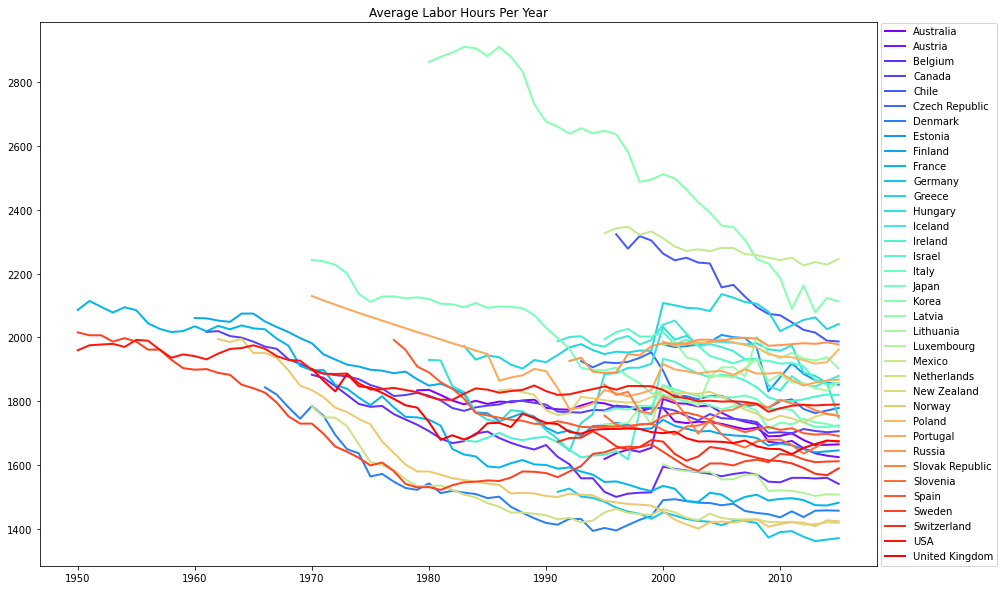

In [32]:
world_historical2.sort_index(inplace=True)
world_historical2.transpose().plot(figsize=(15,10),colormap='rainbow',linewidth=2,title='Average Labor Hours Per Year')
plt.legend(loc='right',bbox_to_anchor=(1.15,0.5))
plt.show()